In [3]:
import os
import numpy as np
import pandas as pd 
import imageio

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageOps
import scipy.ndimage as ndi

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Activation, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing import image
from keras.utils import plot_model

dirname = '/mnt/data/chest_xray/'
train_path = os.path.join(dirname, 'train')
train_nrml_pth = os.path.join(train_path, 'NORMAL')
train_pnm_pth = os.path.join(train_path, 'PNEUMONIA')

train_path_adult = '/mnt/data/rsna-pneumonia-detection-challenge/new_stage_2_train_images_jpg/train/'
train_nrml_pth_adult = os.path.join(train_path_adult, 'NORMAL')
train_pnm_pth_adult = os.path.join(train_path_adult, 'PNEUMONIA')

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [2]:
def plot_imgs(item_dir, num_imgs=5):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(10, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap='gray')

    plt.tight_layout()

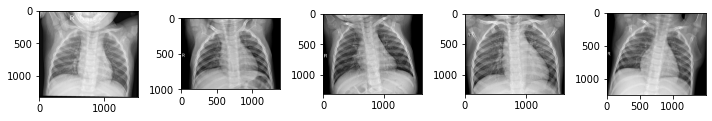

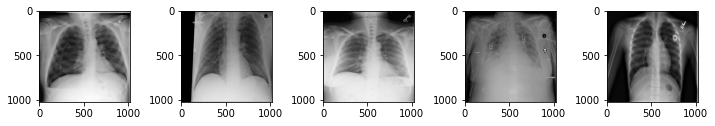

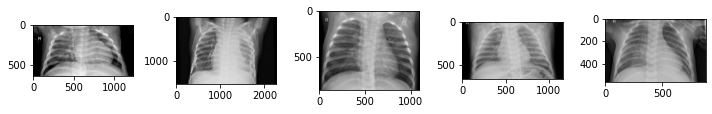

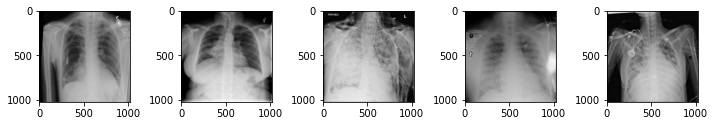

In [66]:
plot_imgs(train_nrml_pth)
plot_imgs(train_nrml_pth_adult)
plot_imgs(train_pnm_pth)
plot_imgs(train_pnm_pth_adult)

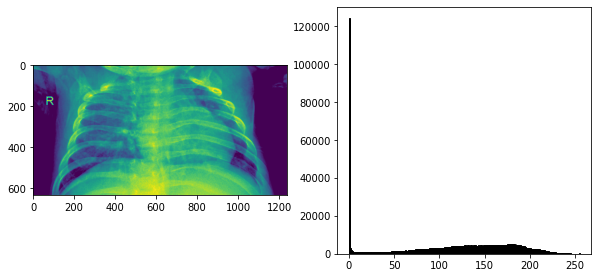

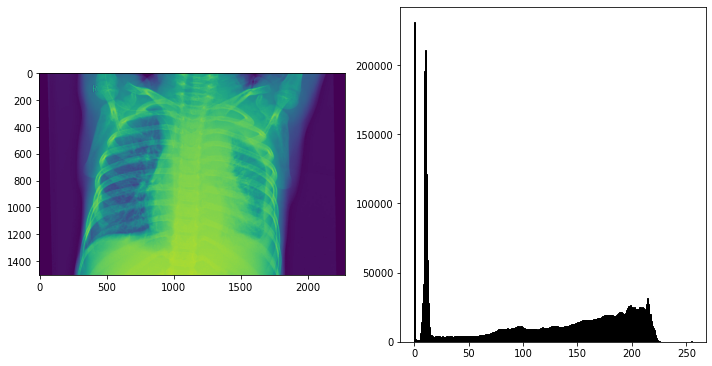

In [52]:
def plot_img_hist(item_dir, num_img=6):
  all_item_dirs = os.listdir(item_dir)
  item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_img]
  
  #plt.figure(figsize=(10, 10))
  for idx, img_path in enumerate(item_files):
    fig1 = plt.figure(idx,figsize=(10, 10))
    fig1.add_subplot(2, 2, 1)
    img = mpimg.imread(img_path, )
    plt.imshow(img)
    fig1.add_subplot(2, 2, 2)
    plt.hist(img.ravel(),bins=256, fc='k', ec='k')
  
  plt.tight_layout()
#plot_img_hist(train_pnm_pth,2)

In [47]:
dir_chest_xray = os.path.join('/mnt/data/kaggle', 'chest_xray')
#os.makedirs('/mnt/data/kaggle/chest_xray/')
#os.mkdir('/mnt/data/kaggle/chest_xray/train')
#os.mkdir('/mnt/data/kaggle/chest_xray/train/NORMAL')
#os.mkdir('/mnt/data/kaggle/chest_xray/train/PNEUMONIA')
train_path_work = os.path.join(dir_chest_xray, 'train')
train_nrml_pth_work = os.path.join(train_path_work, 'NORMAL')
train_pnm_pth_work = os.path.join(train_path_work, 'PNEUMONIA')

#os.mkdir('/mnt/data/kaggle/chest_xray/test')
#os.mkdir('/mnt/data/kaggle/chest_xray/test/NORMAL')
#os.mkdir('/mnt/data/kaggle/chest_xray/test/PNEUMONIA')
test_path_work = os.path.join(dir_chest_xray, 'test')
test_nrml_pth_work = os.path.join(test_path_work, 'NORMAL')
test_pnm_pth_work = os.path.join(test_path_work, 'PNEUMONIA')

dir_chest_xray_adult = os.path.join('/mnt/data/kaggle', 'chest_xray_adult')
#os.makedirs('/mnt/data/kaggle/chest_xray_adult/')
#os.mkdir('/mnt/data/kaggle/chest_xray_adult/train')
#os.mkdir('/mnt/data/kaggle/chest_xray_adult/train/NORMAL')
#os.mkdir('/mnt/data/kaggle/chest_xray_adult/train/PNEUMONIA')
train_path_adult_work = os.path.join(dir_chest_xray_adult, 'train')
train_nrml_pth_adult_work = os.path.join(train_path_adult_work, 'NORMAL')
train_pnm_pth_adult_work = os.path.join(train_path_adult_work, 'PNEUMONIA')

In [48]:
def image_resizing(path_from, path_to, height=500, width=500):
    size = height, width
    i=1
    files = os.listdir(path_from)
    for file in files: 
        try:
            file_dir = os.path.join(path_from, file)
            file_dir_save = os.path.join(path_to, file)
            img = Image.open(file_dir)
            img = img.resize(size, Image.ANTIALIAS)
            #img = img.convert("RGB")
            img.save(file_dir_save) 
            i=i+1
        except:
            continue

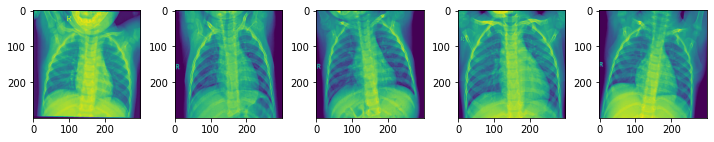

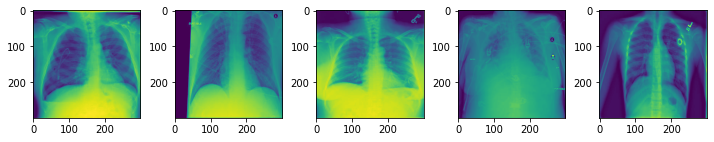

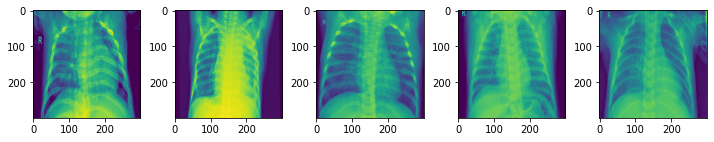

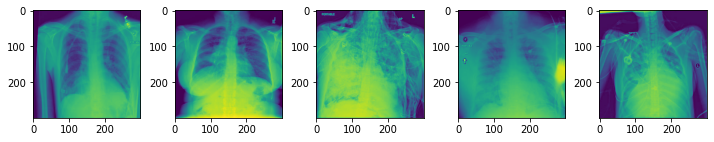

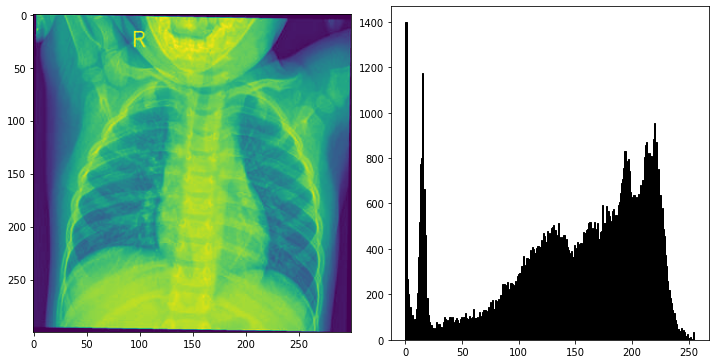

In [61]:
#image_resizing(train_nrml_pth, train_nrml_pth_work)
#image_resizing(train_pnm_pth, train_pnm_pth_work)
#image_resizing(train_nrml_pth_adult, train_nrml_pth_adult_work)
#image_resizing(train_pnm_pth_adult, train_pnm_pth_adult_work)
plot_imgs(train_nrml_pth_work)
plot_imgs(train_nrml_pth_adult_work)
plot_imgs(train_pnm_pth_work)
plot_imgs(train_pnm_pth_adult_work)
plot_img_hist(train_nrml_pth_work,1)

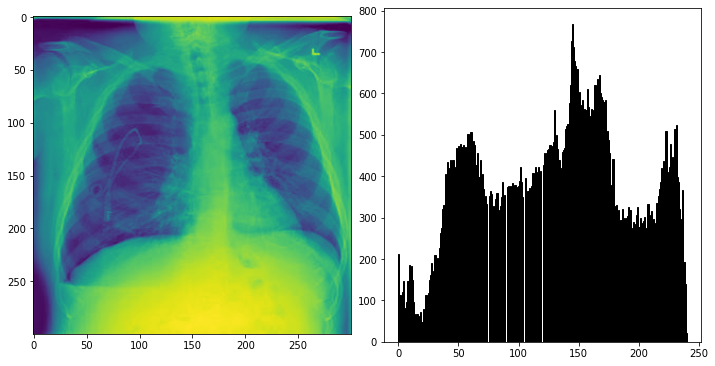

In [62]:
plot_img_hist(train_nrml_pth_adult_work,1)

In [49]:
img_size_h = 300
img_size_w = 300

input_shape = (img_size_h, img_size_w, 1)

model = Sequential([
    Conv2D(32, (3,3), input_shape=input_shape),
    MaxPool2D((2, 2)),
    
    Conv2D(32, (3,3)),
    MaxPool2D((2, 2)),
    
    Conv2D(64, (3,3)),
    MaxPool2D((2, 2)),
    
    Conv2D(64, (3,3)),
    MaxPool2D((2, 2)),
    
    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') 
    
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

train_datagen = ImageDataGenerator(
    rescale=1./255,    
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=45,
    width_shift_range=0.5,
    height_shift_range=0.5,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.5,
    height_shift_range=0.5,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

batch_size = 32
train_generator = train_datagen.flow_from_directory(
    dir_chest_xray_adult,
    target_size=(img_size_h, img_size_w),
    color_mode='grayscale', #we use grayscale images I think
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True, #we shuffle our images for better performance
    seed=8)

validation_generator = val_datagen.flow_from_directory(
    test_path_work,
    target_size=(img_size_h, img_size_w),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    seed=8)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 147, 147, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 33, 33, 64)       

In [50]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001) #0.00001
callback = [learning_rate_reductioning_rate_reduction]
history = model.fit_generator(
    train_generator,
    epochs=5,
    callbacks = callback
    )

Epoch 1/5
174/365 [=============>................] - ETA: 3:55 - loss: 0.0038 - accuracy: 0.9977

KeyboardInterrupt: 

They got healthy!


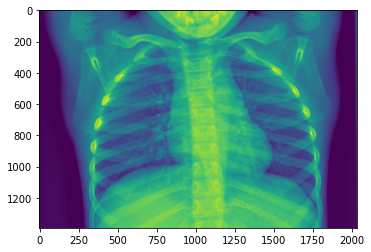

In [31]:
img_test_path = '/mnt/data/chest_xray/test/NORMAL/NORMAL-2280080-0001.jpeg'
img_adult_test_path = '/mnt/data/rsna-pneumonia-detection-challenge/new_stage_2_train_images_jpg/train/NORMAL/6c27f72e-7cda-4e4b-906d-ec6b84cee49e.jpg'

img_p = image.load_img(img_test_path, target_size=(img_size_h, img_size_w), color_mode='grayscale')
img_arr_p = np.array(img_p)
img_arr_p = np.expand_dims(img_arr_p, axis=0)
img_arr_p = np.expand_dims(img_arr_p, axis=3)
images_p = np.vstack([img_arr_p])

def predict_illness(image_path):
    imge = plt.imread(image_path)
    plt.imshow(imge) #, cmap = 'gray'

    img = image.load_img(image_path, target_size=(img_size_h, img_size_w), color_mode='grayscale')
    x = image.img_to_array(img) 
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = model.predict_classes(images, batch_size=10)
    if classes[0][0] == 0:
        print("They got healthy!")
    else:
        print("They got pneumonia!")

predict_illness(img_test_path)

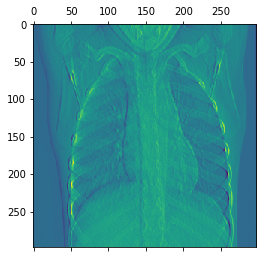

In [32]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers[:len(model.layers)]]                
activation_model = Model(inputs=model.input, outputs=layer_outputs)
                 
activations = activation_model.predict(images_p)

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

conv2d
(298, 298)


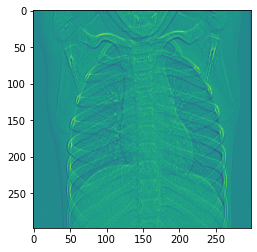

max_pooling2d
(149, 149)


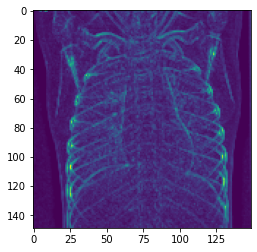

conv2d_1
(147, 147)


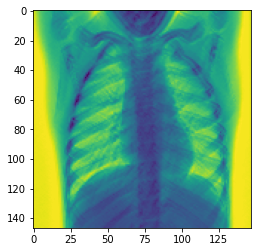

max_pooling2d_1
(73, 73)


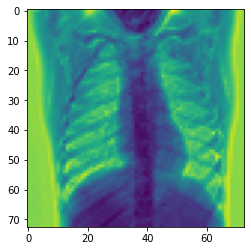

conv2d_2
(71, 71)


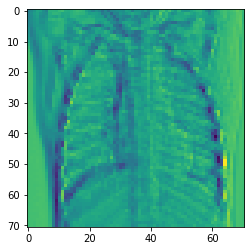

max_pooling2d_2
(35, 35)


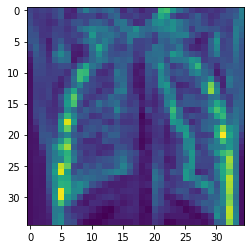

conv2d_3
(33, 33)


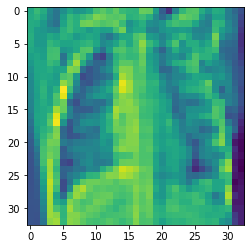

max_pooling2d_3
(16, 16)


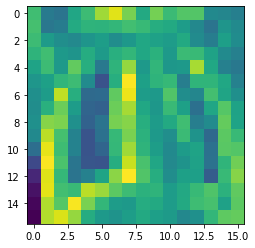

In [40]:
model.layers[:-1]# Droping The Last Dense Layer  
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 
zipped_layers = zip(layer_names, activations)

for layer_name, layer_activation in zipped_layers:
    layer_feature = 0 
    if layer_name.startswith('conv') or layer_name.startswith('max'):
        print(layer_name)
        num = layer_activation.shape[3]
        for i in range(num):
            layer_feature += layer_activation[:,:,:,i]
        layer_feature = layer_feature.squeeze(0)
        print(layer_feature.shape)
        plt.imshow(layer_feature)
        plt.show()

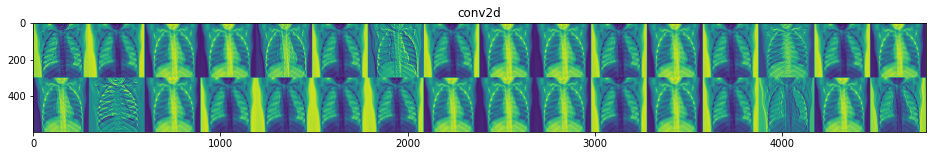

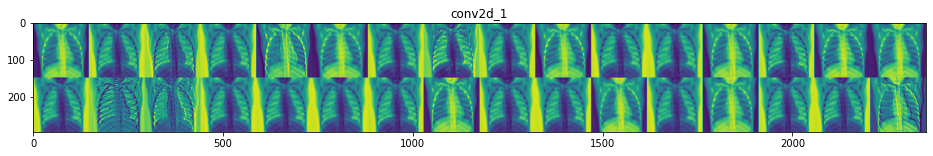

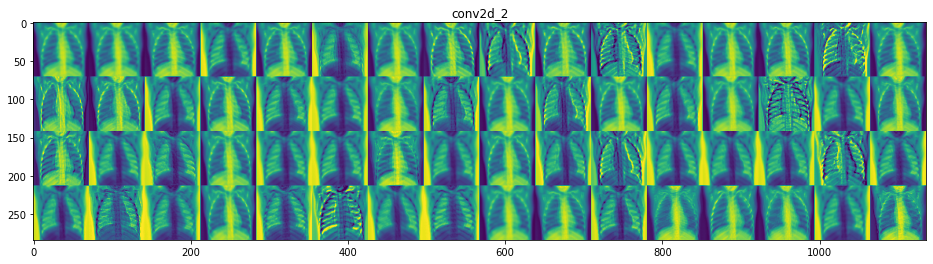

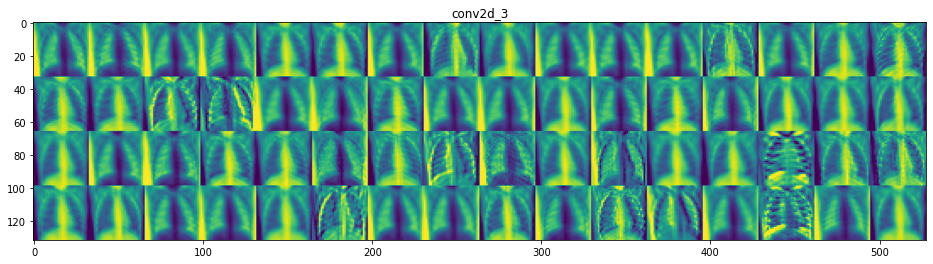

In [34]:
model.layers[:-1]# Droping The Last Dense Layer  
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
zipped_layers = zip(layer_names, activations)
    
for layer_name, layer_activation in zipped_layers: #this loop     
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

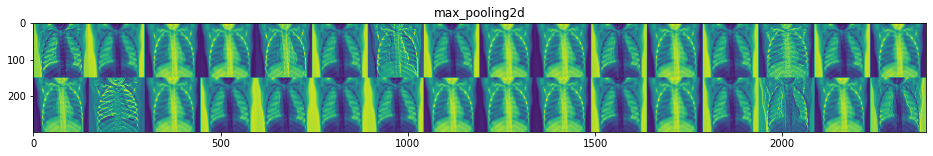

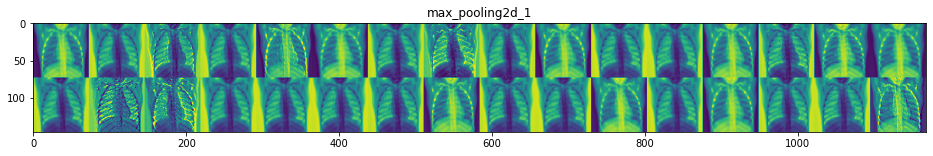

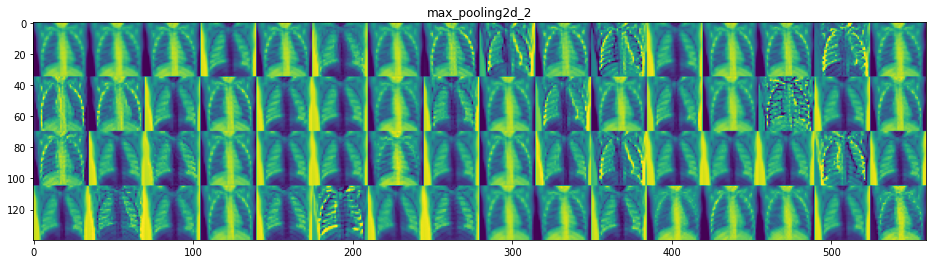

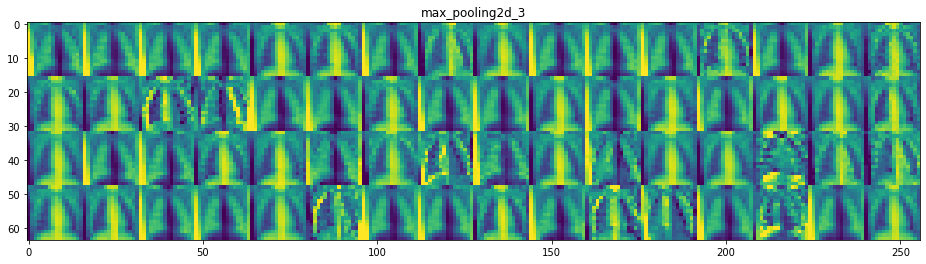

In [35]:
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('max'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')